# Libraries

In [1]:
# plot the graphs inline
%matplotlib inline

In [2]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Introduction

This week we are going to work with some text data. In this folder, you should a text file called 'fullpapers.txt'. This file was generated by converting the proceedings of the EDM (Educational Data Mining) conference of 2018. You can find the proceedings here: http://educationaldatamining.org/EDM2017/proc_files/fullpapers.pdf
We are going to explore the different terms that are used by authors of the papers in this conference, which will require some data cleaning!

# Import the data

Our goal is compare the different papers in terms of the vocabulary used. 
* open the pdf of the proceedings (fullpapers.pdf); 
* open the txt of the proceedigs (fullpapers.txt)

1) we want to split the data into different papers. Brainstorm a few ideas on how to do that:
* 
* 

In [3]:
# 2) First we are going to read the fullpapers.txt file 
# and assign its content to a variable called "data"
# hint: https://stackoverflow.com/questions/3758147/easiest-way-to-read-write-a-files-content-in-python
with open('fullpapers.txt') as f: data = f.read()

In [4]:
# 3) To facilitate data processing, we want to split this file
# into different pages. Create a list called "pages" that 
# stores the text presented on each page of the pdf
# Look into the .split() function, what string are we going to want to split by?
pages = data.split('Proceedings of the 10th International Conference on Educational Data Mining')
print(type(pages))
print(len(pages))


<class 'list'>
143


In [5]:
# 4) because we don't want to deal with upper case / lower case issues
# we are going to lower case everything:
# Try using a list comprehension to accomplish this task
pages=[page.lower() for page in pages]
    
print(pages)

['\x0czone out no more: mitigating mind wandering during\ncomputerized reading\nsidney k. d’mello, caitlin mills, robert bixler, & nigel bosch\nuniversity of notre dame\n118 haggar hall\nnotre dame, in 46556, usa\nsdmello@nd.edu\n\nabstract\nmind wandering, defined as shifts in attention from task-related\nprocessing to task-unrelated thoughts, is a ubiquitous\nphenomenon that has a negative influence on performance and\nproductivity in many contexts, including learning. we propose\nthat next-generation learning technologies should have some\nmechanism to detect and respond to mind wandering in real-time.\ntowards this end, we developed a technology that automatically\ndetects mind wandering from eye-gaze during learning from\ninstructional texts. when mind wandering is detected, the\ntechnology intervenes by posing just-in-time questions and\nencouraging re-reading as needed. after multiple rounds of\niterative refinement, we summatively compared the technology to\na yoked-control in 

5) Now we would like to join pages if they below to the same paper. Can you think of keywords we could like for to decided if the current page is starting a new paper? Write down two ideas:
1. abstract
2. introduction

In [6]:
# 6) create a new list called "papers", which is going to contain 
# all the papers we have. Iterate through all the pages and 
# add a new element to the list when you have a full paper
# Using a for loop to iterate over all the pages, try to think of a conditional statement to check whether a page
# represents a new 'paper'. I.e. what is a common aspect of all papers? 
papers = []
current_paper = ''

# iterate through the pages and add each paper to the list "papers"
for page in pages:
    if 'abstract' in page and 'introduction' in page:
        if current_paper != '':
            papers.append(current_paper)
            current_paper = ''
            current_paper = page
        else:
            current_paper += page
    else:
        current_paper += page
        


In [7]:
# 7) print how many files you have in the "papers" list:
print(len(papers))

17


In [8]:
# 8) print the content of the first two papers to make sure it worked
# (only print the first 300 characters)
for paper in range(2):
    print(papers[paper][:300])

zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
process


15

measuring similarity of educational items using data on
learners’ performance
jiří řihák

faculty of informatics
masaryk university
brno, czech republic

thran@mail.muni.cz
abstract
educational systems typically contain a large pool of items
(questions, problems). using data mining techniqu


In [9]:
# 9) create a new folder called papers; this is where we are 
# going to save each paper into a separate text file
# hint: google "how to create a new folder with python"
import os, shutil
path = '/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/'
if os.path.isdir(path + 'papers/'):
    shutil.rmtree(path + 'papers', ignore_errors=False, onerror=None)
os.mkdir(path + 'papers/')

In [10]:
# 10) save each paper into its unique file in the "Papers" folder
# we created above
# Hint: "enumerate" can provide you with the index of the paper in the list
# Feel free to use the following filename for the first paper in the list:
# ./Papers/paper0.txt on mac and .\Papers\paper0.txt on windows
for idx, paper in enumerate(papers):
    filename = path + 'papers/' + 'paper' + str(idx) + '.txt'
    file = open(filename,'w') 
    file.write(papers[idx]) 
    print(filename)

/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper0.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper1.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper2.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper3.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper4.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper5.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper6.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper7.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper8.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper9.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/paper10.txt
/Users/erincarvalho/Desktop/dev/week4-data-cleaning-Erin-c-master/papers/pa

You might be asking yourself why we need to save the data into text files (instead of just using the list of papers above). One answer is that when we work with large datastsets, it's useful to save snapshots of our data that is "clean". This way we don't have to re-run all the code above and we save time. It also allows us to share data between different notebooks for other types of analysis!

# Count frequencies

In [11]:
# 11) We are going to practice your "glob" skills - find all the 
# text files in the "Papers" folder with a glob command!
import glob

txt_files = glob.glob('papers/*.txt')
print(txt_files)

['papers/paper12.txt', 'papers/paper5.txt', 'papers/paper4.txt', 'papers/paper13.txt', 'papers/paper11.txt', 'papers/paper6.txt', 'papers/paper7.txt', 'papers/paper10.txt', 'papers/paper14.txt', 'papers/paper3.txt', 'papers/paper2.txt', 'papers/paper15.txt', 'papers/paper0.txt', 'papers/paper1.txt', 'papers/paper16.txt', 'papers/paper9.txt', 'papers/paper8.txt']


In [12]:
# 12) iterate through each of the text files and read their contents in the variable below:
# Using a for loop, iterate over all the files in the directory, and add them to the list below
text_list = []

for txt_file in txt_files:
    print(txt_file)
    with open(txt_file) as f:
        words = f.read()
        text_list.append(words)
        
print(type(text_list))

papers/paper12.txt
papers/paper5.txt
papers/paper4.txt
papers/paper13.txt
papers/paper11.txt
papers/paper6.txt
papers/paper7.txt
papers/paper10.txt
papers/paper14.txt
papers/paper3.txt
papers/paper2.txt
papers/paper15.txt
papers/paper0.txt
papers/paper1.txt
papers/paper16.txt
papers/paper9.txt
papers/paper8.txt
<class 'list'>


In [13]:
# 13) Now we are going to compute the frequency of each word across all 
# documents. Feel free to use the link below to help you!
# hint: https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency
# (look at the first block of code in the article)
# Using the text_list we create in the cell above, iterate over all words and count their frequencies
# If uncomfortable with dictionaries, google python dict
word_freq = defaultdict(int)

for text in text_list:
    for word in text.split():
        word_freq[word] += 1

In [14]:
# 14) If you haven't done so already, create a dataframe from the dictionary
# and print the head of the dataframe
# Just as we did last week with Pandas, we can do this in only a few lines
df_words = pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})

print(df_words.head())

     abs_freq
the      5663
of       3402
and      2704
to       2406
a        2028


What's a problem with the dataframe above? Is there data meaningful?

In [15]:
# 15) We are going to remove the following stop words, so that we see more interesting 
# keywors. Feel free to use the list and hint below to help you:
# hint: https://stackoverflow.com/questions/43716402/remove-row-index-dataframe-pandas
# the .drop() function could prove useful here
STOPWORDS = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can',
             'cannot','could','dear','did','do','does','either','else','ever','every',
             'for','from','get','got','had','has','have','he','her','hers','him','his',
             'how','however','i','if','in','into','is','it','its','just','least','let',
             'like','likely','may','me','might','most','must','my','neither','no','nor',
           'not','of','off','often','on','only','or','other','our','own','rather','said',
             'say','says','she','should','since','so','some','than','that','the','their',
             'them','then','there','these','they','this','tis','to','too','twas','us',
             'wants','was','we','were','what','when','where','which','while','who',
             'whom','why','will','with','would','yet','you','your']

df_words.drop(STOPWORDS, axis=0, inplace=True, errors='ignore')

In [16]:
# 16) print the top 20 words of your new dataframe: we can do this with a list slice 
print(df_words.head(20))

             abs_freq
learning          638
data              512
students          421
student           407
=                 393
each              350
model             345
more              310
using             278
used              258
performance       241
between           231
number            213
two               207
based             198
set               184
different         179
educational       173
models            172
results           171


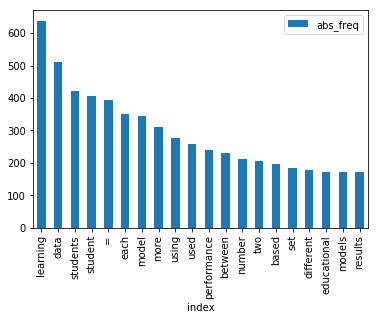

In [17]:
# 17 plot the top 20 results above as a histogram: 
top20words= df_words[:20]
top20words.reset_index().plot.bar(x='index', y='abs_freq')


What can you tell from this historgram? What do EDM researchers seem to care about?

- learning, data, and students

What are improvements you could add to our data cleaning process? Write at least three things:
- stripping out symbols like '=' and ',' from rows in the data frame
- stripping out page numbers from "text_list"
- labeling the index as 'keywords' or something similar to refer to that column more easily

# Count word frequencies per paper

While the previous section gave us an overall description of the word frequency for all the papers, it would be interesting to look at each individual paper. This is what we are going to do below, by focusing on the top 30 terms used.

In [18]:
# 18) save the top 30 words from the dataframe above 
# in a new variable called "top_words"
top_words = df_words[:30]
top_words = list(top_words.index.values)
print(top_words)

['learning', 'data', 'students', 'student', '=', 'each', 'model', 'more', 'using', 'used', 'performance', 'between', 'number', 'two', 'based', 'set', 'different', 'educational', 'models', 'results', 'features', 'knowledge', 'time', 'analysis', 'work', 'figure', 'use', ',', 'table', 'mind']


In [19]:
# 19) We are now going to construct a new dataframe where each row is a paper, 
# each column is one of the top 30 words used and each cell is a count of this word. 
# NOTE: make sure you add another field called "text" where you're going to store the 
# actual text of the paper. 
# Hint: build a list of dataframes (one for each papers), 
# and use the concat function from pandas to concatenate them!
d = []

for text in text_list:
    dic = defaultdict(int)
    dic['text'] = text
    # iterate through the top words, add counts to the dictionary
    for word in text.split():
        if word in top_words:
            dic[word] += 1 
    # and append the results to the list above (d)
    d.append(dic)

# concatenate the list d into a dataframe
listd_df = []

for paper in d:
    item = pd.DataFrame(paper, index=[0])
    listd_df.append(item)

print(type(d))

df_concat = pd.concat(listd_df, sort=False)
df_concat.head()

df_concat.info()

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 0
Data columns (total 31 columns):
text           17 non-null object
analysis       16 non-null float64
data           17 non-null int64
learning       17 non-null int64
using          17 non-null int64
model          17 non-null int64
used           16 non-null float64
each           17 non-null int64
based          17 non-null int64
different      17 non-null int64
results        17 non-null int64
between        17 non-null int64
students       15 non-null float64
=              17 non-null int64
two            16 non-null float64
more           17 non-null int64
student        16 non-null float64
number         17 non-null int64
use            17 non-null int64
work           17 non-null int64
features       14 non-null float64
performance    17 non-null int64
educational    17 non-null int64
knowledge      17 non-null int64
time           17 non-null int64
table          16 non-null float64
mind      

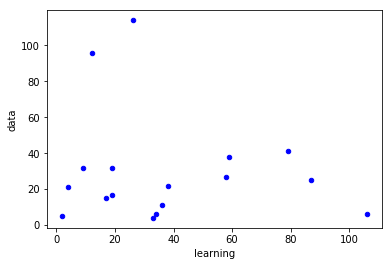

In [20]:
# 20) create a scatter plot of the words 'learning' and 'data'
# what can you say from it?
df_concat.plot.scatter(x='learning',y='data',c='b')
plt.show()

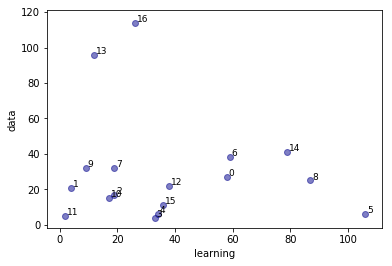

In [21]:
# 21) annotate each point with the index number of the dataframe
# hint: https://www.pythonmembers.club/2018/05/08/matplotlib-scatter-plot-annotate-set-text-at-label-each-point/
# plt.txt( ) is going to be helpful for us here
df_concat = df_concat.reset_index(drop=True)

for i,type in enumerate(df_concat.index):
    x = df_concat.at[i,'learning']
    y = df_concat.at[i,'data']
    plt.xlabel('learning')
    plt.ylabel('data')
    plt.scatter(x, y, color='darkblue', alpha = 0.5)
    plt.text(x+0.7, y+0.7, type, fontsize=9)
plt.show()


In [22]:
# 22) what are the two extreme papers, 
# i.e., papers with more occurences for each term on each axis?

#Two extremes: 16 (high on data) and 5 (high on learning)

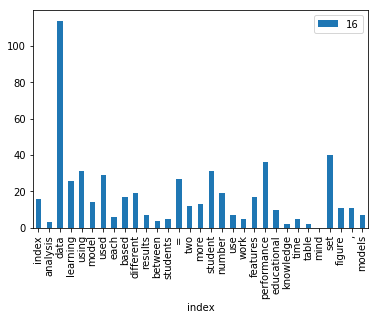

In [23]:
# 23) plot the histogram of the paper that had high counts of "data"
# hint: https://stackoverflow.com/questions/52392728/create-a-histogram-based-on-one-row-of-a-dataframe
# .loc is going to be helpful here

df_16 = df_concat.reset_index()
df_16 = df_16.drop(columns=['text'])
df_16 = df_16.T

df_16 = df_16[[16]].reset_index()
df_16.head()
df_16.plot.bar(x='index',y=16)



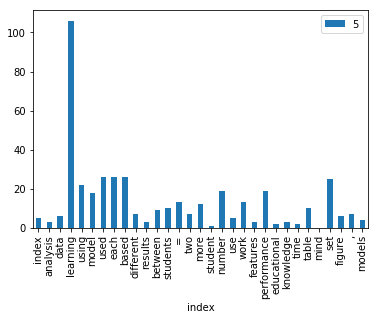

In [24]:
# 24) plot the histogram of the paper that had high counts of "learning"
# .loc is going to be helpful here
df_5 = df_concat.reset_index()
df_5 = df_5.drop(columns=['text'])
df_5 = df_5.T

df_5 = df_5[[5]].reset_index()
df_5.head()
df_5.plot.bar(x='index',y=5)

In [25]:
# 25) what can you observe? 
#df_16 data is really high
#df_5 learning is really high

In [26]:
# 26) print the first 1000 characters of each paper. 
print (papers[5][0:1000])
print (papers[16][0:1000])

# Is your interpretation confirmed?
#df_5 doesn't seem to be specifically about learning but df_16 seems to be heavily focused on data



47

grade prediction with temporal course-wise influence
zhiyun ren

computer science
george mason university
4400 university drive,
fairfax, va 22030

zren4@gmu.edu

xia ning

computer & information
science
indiana university - purdue
university indianapolis
420 university blvd,
indianapolis, in 46202

huzefa rangwala

computer science
george mason university
4400 university drive,
fairfax, va 22030

rangwala@cs.gmu.edu

xning@cs.iupui.edu

abstract
there is a critical need to develop new educational technology applications that analyze the data collected by universities to ensure that students graduate in a timely fashion
(4 to 6 years); and they are well prepared for jobs in their
respective fields of study. in this paper, we present a novel
approach for analyzing historical educational records from
a large, public university to perform next-term grade prediction; i.e., to estimate the grades that a student will get
in a course that he/she will enroll in the next term. accurate n

# Regex

In this section we are going to work with Regex formulas to extract part of the paper. 

In [27]:
# 27) we are going to work on the first paper to make sure that our 
# regex works. Just retrieve the text and assign it to a variable below
p1 = papers[0]
print(p1)

zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
processing to task-unrelated thoughts, is a ubiquitous
phenomenon that has a negative influence on performance and
productivity in many contexts, including learning. we propose
that next-generation learning technologies should have some
mechanism to detect and respond to mind wandering in real-time.
towards this end, we developed a technology that automatically
detects mind wandering from eye-gaze during learning from
instructional texts. when mind wandering is detected, the
technology intervenes by posing just-in-time questions and
encouraging re-reading as needed. after multiple rounds of
iterative refinement, we summatively compared the technology to
a yoked-control in an experiment with 104 par

In [28]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203

p1Abstract = re.findall('abstract(.*\n?)introduction', p1, re.DOTALL)

print(p1Abstract)

['\nmind wandering, defined as shifts in attention from task-related\nprocessing to task-unrelated thoughts, is a ubiquitous\nphenomenon that has a negative influence on performance and\nproductivity in many contexts, including learning. we propose\nthat next-generation learning technologies should have some\nmechanism to detect and respond to mind wandering in real-time.\ntowards this end, we developed a technology that automatically\ndetects mind wandering from eye-gaze during learning from\ninstructional texts. when mind wandering is detected, the\ntechnology intervenes by posing just-in-time questions and\nencouraging re-reading as needed. after multiple rounds of\niterative refinement, we summatively compared the technology to\na yoked-control in an experiment with 104 participants. the key\ndependent variable was performance on a post-reading\ncomprehension assessment. our results suggest that the\ntechnology was successful in correcting comprehension deficits\nattributed to mind

In [29]:
# 29) find the text between the words 'abstract' and 
# 'introduction' for the first paper using the .index() function


abstractNum = p1.index('abstract')
introNum = p1.index('introduction')

p1Abstract2 = p1[abstractNum:introNum]
print(p1Abstract2)


abstract
mind wandering, defined as shifts in attention from task-related
processing to task-unrelated thoughts, is a ubiquitous
phenomenon that has a negative influence on performance and
productivity in many contexts, including learning. we propose
that next-generation learning technologies should have some
mechanism to detect and respond to mind wandering in real-time.
towards this end, we developed a technology that automatically
detects mind wandering from eye-gaze during learning from
instructional texts. when mind wandering is detected, the
technology intervenes by posing just-in-time questions and
encouraging re-reading as needed. after multiple rounds of
iterative refinement, we summatively compared the technology to
a yoked-control in an experiment with 104 participants. the key
dependent variable was performance on a post-reading
comprehension assessment. our results suggest that the
technology was successful in correcting comprehension deficits
attributed to mind wandering 

In [30]:
# 30) add a new column namd "abstract" to the dataframe above 
# and initialize it with an empty string

df_concat['abstract'] = ''
df_concat.head()

,text,analysis,data,learning,using,model,used,each,based,different,...,educational,knowledge,time,table,mind,set,figure,",",models,abstract
0,\n\n103\n\n epistemic network analysis and top...,24.0,27,58,15,12,15.0,47,11,12,...,6,1,3,7.0,2.0,7,8,7.0,6.0,
1,\n\n47\n\n grade prediction with temporal cour...,5.0,21,4,15,17,NaN,11,7,10,...,9,5,5,9.0,NaN,3,9,38.0,9.0,
2,\n\n39\n\n the antecedents of and associations...,4.0,17,19,5,3,9.0,24,14,19,...,31,2,9,22.0,1.0,2,4,NaN,NaN,
3,\n\n111\n\n towards closing the loop: bridging...,5.0,4,33,9,5,17.0,40,11,7,...,3,2,18,15.0,NaN,32,2,12.0,NaN,
4,\n\n95\n\n addressing student behavior and aff...,3.0,6,34,5,9,6.0,11,3,13,...,5,4,12,13.0,1.0,2,6,NaN,9.0,


In [36]:
# now add the abstracts to each row of the dataframe using either
# of the two methods above
# Hint: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

for idx, row in df_concat.iterrows():
    s = re.findall('abstract(.*\n?)introduction', row['text'], re.DOTALL)
    df_concat.at[idx,'abstract'] = s[0]
    
df_concat.head()
    

,text,analysis,data,learning,using,model,used,each,based,different,...,educational,knowledge,time,table,mind,set,figure,",",models,abstract
0,\n\n103\n\n epistemic network analysis and top...,24.0,27,58,15,12,15.0,47,11,12,...,6,1,3,7.0,2.0,7,8,7.0,6.0,\nthis study investigates a possible way to an...
1,\n\n47\n\n grade prediction with temporal cour...,5.0,21,4,15,17,NaN,11,7,10,...,9,5,5,9.0,NaN,3,9,38.0,9.0,\nthere is a critical need to develop new educ...
2,\n\n39\n\n the antecedents of and associations...,4.0,17,19,5,3,9.0,24,14,19,...,31,2,9,22.0,1.0,2,4,NaN,NaN,\nreplayability has long been touted as a bene...
3,\n\n111\n\n towards closing the loop: bridging...,5.0,4,33,9,5,17.0,40,11,7,...,3,2,18,15.0,NaN,32,2,12.0,NaN,"\nin this study, we applied decision trees (dt..."
4,\n\n95\n\n addressing student behavior and aff...,3.0,6,34,5,9,6.0,11,3,13,...,5,4,12,13.0,1.0,2,6,NaN,9.0,\nwe present results of a randomized controlle...


In [37]:
# 31) print your abstracts (they should contain a lot of \n = carriage return)
df_concat['abstract']

0     \nthis study investigates a possible way to an...
1     \nthere is a critical need to develop new educ...
2     \nreplayability has long been touted as a bene...
3     \nin this study, we applied decision trees (dt...
4     \nwe present results of a randomized controlle...
5     \nexpertise in a domain of knowledge is charac...
6     \nwe propose a new model for learning that rel...
7     \nwe investigate generalizability of face-base...
8     \nin this paper, we investigate the relationsh...
9     \n\nproblem-solving skills in creative, open-e...
10    \n\nmassive open online courses (moocs) have d...
11    \nadaptive learning technologies hold great pr...
12    \nmind wandering, defined as shifts in attenti...
13    \neducational systems typically contain a larg...
14    \nresearch in educational data mining could be...
15    \n\nwe show how the novel use of a semantic re...
16    \ngathering labeled data in educational data m...
Name: abstract, dtype: object

In [40]:
# 32) clean the abstract column using the "apply" function with a lambda
# Hint: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html

df_concat.abstract = df_concat.abstract.apply(lambda x: x.strip('\n'))
df_concat.head()


,text,analysis,data,learning,using,model,used,each,based,different,...,educational,knowledge,time,table,mind,set,figure,",",models,abstract
0,\n\n103\n\n epistemic network analysis and top...,24.0,27,58,15,12,15.0,47,11,12,...,6,1,3,7.0,2.0,7,8,7.0,6.0,this study investigates a possible way to anal...
1,\n\n47\n\n grade prediction with temporal cour...,5.0,21,4,15,17,NaN,11,7,10,...,9,5,5,9.0,NaN,3,9,38.0,9.0,there is a critical need to develop new educat...
2,\n\n39\n\n the antecedents of and associations...,4.0,17,19,5,3,9.0,24,14,19,...,31,2,9,22.0,1.0,2,4,NaN,NaN,replayability has long been touted as a benefi...
3,\n\n111\n\n towards closing the loop: bridging...,5.0,4,33,9,5,17.0,40,11,7,...,3,2,18,15.0,NaN,32,2,12.0,NaN,"in this study, we applied decision trees (dt) ..."
4,\n\n95\n\n addressing student behavior and aff...,3.0,6,34,5,9,6.0,11,3,13,...,5,4,12,13.0,1.0,2,6,NaN,9.0,we present results of a randomized controlled ...


## Comparing documents using TF-IDF (optional)

In [34]:
# 33) now we are going to do something a little more advanced:'
# we are going to compute the similarity between two texts
# using a method called tf-idf (we'll talk more about it later)
# Hint: https://stackoverflow.com/questions/43631533/similarity-between-two-text-documents-in-python
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


ModuleNotFoundError: No module named 'sklearn'

34) What can you observe?

In [ ]:
# 35) repeat the same procedure with the entire papers
# Use the same logic as the previous cell, but use the text_list variable that we defined previously


In [ ]:
# 36) What are two documents that seem to be very similar?
# print their abstract: 
# print the first 1000 characters of each paper. 


In [ ]:
# 37) what seems to be similar between them? 

# they both talk about analyzing questions and answers from students

## Free exploration (Optional)

- try to extract the names of the author
- find a way to get the top words shared across two texts
- use a regex (or any other method) to get the list of references